## Analysis of Data from the Titantic

What follows is the raw data from the passenger lists of the Titantic.  I thought it would be interesting to see what conclusions I could tease out of the raw data given.

In [2]:
import pandas as pd
ttan = pd.read_csv('titanic.csv')
print(ttan)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [3]:
import matplotlib.pyplot as plt
import numpy as np


### Distribution of Passengers by Class:
The first thing I'd like to do is to see the distribution of the passengers by class. This will be easiest by making a histogram of pClass.

<function matplotlib.pyplot.show(*args, **kw)>

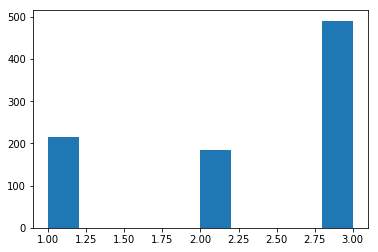

In [4]:
plt.hist(ttan.Pclass)
plt.show

### Reflections:
1) This is picky, but I really don't like the default of the x-axis for this graph.

2) Actually, a histogram isn't really called for in this case, as the "Class" of each passenger really aren't numbers per se and thus a scale in the x direction isn't called for.  Perhaps something in a pie chart.  

Of course, when making a pie chart,  the first thing we will have to do is to get our data for individual passengers to be aggregated by passenger class.

### Passengers Grouped by Class:

In [5]:
ttan.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


Note that the counts above are simply records which _have data within that field_ of the record.  For example, in first class there were 216 passengers and the status of their survival is known for each of them. The age is known for only 186 of them.  To get the totals for how many of each class survived, we have to first group them by class and then sum up how many survived.

In [6]:
ttan.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Here I'm creating a new data frame to hold the survival information by class of passenger.

In [7]:
survivalByClass = np.array([['1st_Surv', 136],
                            ['1st Died', 216-136],
                            ['2nd Surv', 87],
                            ['2nd Died', 184-87],
                            ['3rd Surv', 119],
                            ['3rd Died', 491-119]])
myDF= pd.DataFrame(survivalByClass)
myDF.columns = ['cohort', 'counts']
myDF

,cohort,counts
0,1st_Surv,136
1,1st Died,80
2,2nd Surv,87
3,2nd Died,97
4,3rd Surv,119
5,3rd Died,372


As this pie chart shows relatively clearly, although there were approximately the same number of survivors from 3rd class passengers, as a percent of (much larger) number in 3rd class, there was a distinct disadvantage to be a third class passenger.

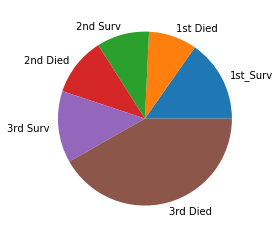

In [8]:
plt.pie(myDF.counts, labels=myDF.cohort)
plt.show()

## Women First?

Let's start by determining whether being a woman was an advantage for survival, and, if so, would that be a partial explanation for the differences in survival rates between passenger class.

In [9]:
ttan.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [10]:
ttan.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [11]:
survivalBySex = np.array([['female_Surv', 233],
                          ['female_Died', 314-233],
                            ['male_Surv', 109],
                            ['male_Died', 577-109]])
mySexDF=pd.DataFrame(survivalBySex)
mySexDF.columns = ['cohort', 'counts']
mySexDF

,cohort,counts
0,female_Surv,233
1,female_Died,81
2,male_Surv,109
3,male_Died,468


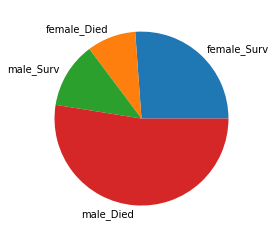

In [12]:
plt.pie(mySexDF.counts, labels=mySexDF.cohort)
plt.show()

### Conclusion:
Taken as a whole, there is overwhelming evidence that females were definitely given preferential status.  But let's explore whether this was true across all levels of passenger class.

In [13]:
firstClass=pd.DataFrame(ttan[ttan['Pclass']==1])
firstClass.groupby('Sex')['Survived'].sum()

Sex
female    91
male      45
Name: Survived, dtype: int64

In [14]:
firstClass.groupby('Sex')['Survived'].count()

Sex
female     94
male      122
Name: Survived, dtype: int64

In [15]:
secondClass=pd.DataFrame(ttan[ttan['Pclass']==2])
secondClass.groupby('Sex')['Survived'].sum()

Sex
female    70
male      17
Name: Survived, dtype: int64

In [16]:
secondClass.groupby('Sex')['Survived'].count()

Sex
female     76
male      108
Name: Survived, dtype: int64

In [17]:
thirdClass=pd.DataFrame(ttan[ttan['Pclass']==3])
thirdClass.groupby('Sex')['Survived'].sum()

Sex
female    72
male      47
Name: Survived, dtype: int64

In [18]:
thirdClass.groupby('Sex')['Survived'].count()

Sex
female    144
male      347
Name: Survived, dtype: int64

TypeError: legend only accepts two non-keyword arguments

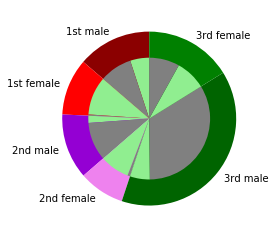

In [20]:
# Data to plot
labels = ['1st male','1st female','2nd male','2nd female','3rd male','3rd female']
colors = ['darkred', 'r', 'darkviolet', 'violet','darkgreen', 'g']
counts = [122,94,108,76,347,144]
livedDied = [45,122-45,91,3,17,108-17,70,6,47,347-47, 72, 144-72]
colorsLD = ['lightgreen','grey','lightgreen','grey','lightgreen','grey','lightgreen','grey','lightgreen','grey','lightgreen','grey']

# Plots
plt.pie(counts, labels=labels, colors=colors, startangle=90)
plt.pie(livedDied, colors=colorsLD, startangle=90,radius=.7)
plt.legend(['lightgreen','grey'],['Lived','Died'],(1,1),"lower_right")
centre_circle=plt.Circle((0,0),.5,color='black',fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
firstClassFemale=pd.DataFrame(firstClass[firstClass['Sex']=='female'])
firstClassFemaleDied=pd.DataFrame(firstClassFemale[firstClassFemale['Survived']==0])
firstClassFemaleDied

### Why did First Class women die?
The two female passengers in First Class who perished, effectively _chose_ not to remain in a lifeboat - thus even the two who died could have been saved if not for their own decisions <br><br>
(1) <Nbsp> <Nbsp> [Heart breaking tale of Bessie Allison](https://www.encyclopedia-titanica.org/titanic-victim/hudson-joshua-creighton.html) <br>
(2)  <Nbsp> <Nbsp> Miss Isham, a 50 year old unmarried woman, refused to leave her Great Dane behind and jumped out of her lifeboat.<br>
(3)  <Nbsp> <Nbsp> __Note:__There are two other first class female passengers who died but do not seem to be in this data set.

In [ ]:
secondClassFemale=pd.DataFrame(secondClass[secondClass['Sex']=='female'])
secondClassFemaleDied=pd.DataFrame(secondClassFemale[secondClassFemale['Survived']==0])
secondClassFemaleDied

### Why did Second Class women die?

(1) <Nbsp> <Nbsp> Mrs. Mack was recently widowed and refused to board a lifeboath. <br>
(2)  <Nbsp> <Nbsp> Miss Yrois did not board for reasons known only to herself.<br>
(3)  <Nbsp> <Nbsp> The rest of the ladies were childless and refused to leave their husbands.